### Context Problem:
> *With the rapid development of telecommunication industry, the service providers are inclined more towards expansion of the subscriber base. To meet the need of surviving in the competitive environment, the retention of existing customers has become a huge challenge. It is stated that the cost of acquiring a new customer is far more than that for retaining the existing one. Therefore, it is imperative for the telecom industries to use advanced analytics to understand consumer behavior and in-turn predict the association of the customers as whether or not they will leave the company.*

**Objective:**
- Understanding the consumer behaviour who likely to churn
- Identify which factor contributes to customer churn
- Build a predictive model that will classify if a telecom customer will churn or not

**Data Content:**

Dataset contains customer level information for a telecom company. Various attributes related to the services used are recorded for each customer. Below is the attributes related:

- Churn → 1 if customer cancelled service, 0 if not
- AccountWeeks → number of weeks customer has had active account
- ContractRenewal → 1 if customer recently renewed contract, 0 if not
- DataPlan → 1 if customer has data plan, 0 if not
- DataUsage → gigabytes of monthly data usage
- CustServCalls → number of calls into customer service
- DayMins → average daytime minutes per month
- DayCalls → average number of daytime calls
- MonthlyCharge → average monthly bill
- OverageFee → largest overage fee in last 12 months

### Telecom Churn Understanding

As Investopedia notes, we most commonly see churn expressed as a percentage of subscribers who leave within a given timeframe. In the case of telecoms specifically, **churn usually takes the form of a customer ending their contract or canceling their subscription service**.

**The reasons for churn in telecoms:**

Based on the results of a comprehensive survey conducted by TechSee, survey data shows that 39% of Americans who canceled a contract with a company in the past 24 months cited **customer service as the primary reason**, such as customer has to call more than once. Other primary reasons are:
- companies wasted their time (they waited too long to have their issue resolved)
- untrained or incompetent agents (thought the reps were rude or had a negative approach), and
- inferior self-service options

Also from the survey reveal that **every lost customer has the potential to cause the churn of many others, further highlighting the importance of ensuring that each and every customer is encouraged to stay with their current telecom provider**.

Reference:
- https://www.investopedia.com/terms/c/churnrate.asp
- https://www.europeanbusinessreview.com/how-costly-is-customer-churn-in-the-telecom-industry/
- https://techsee.me/resources/surveys/2019-telecom-churn-survey/

After having knowledge about telecom churn, here's the steps we'll use:

1. Data overview
2. Exploratory Data Analysis (EDA)
3. Classification Modeling
4. Rebalance Sample Size
5. Cross Validation
6. Parameter Tuning
7. Feature Importance
8. Results and Summary

### Data Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style = 'whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('telecom_churn.csv')
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


Our data doesn't have missing value

In [4]:
data.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [5]:
data['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [6]:
data['ContractRenewal'].value_counts()

1    3010
0     323
Name: ContractRenewal, dtype: int64

In [7]:
data.groupby('Churn').mean()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Churn,,,,,,,,,,
0,100.793684,0.934737,0.295439,0.862151,1.449825,175.175754,100.283158,55.816246,9.954618,10.158877
1,102.664596,0.716356,0.165631,0.546957,2.229814,206.914079,101.335404,59.190062,10.623085,10.700000


In [8]:
data.groupby('Churn').max()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Churn,,,,,,,,,,
0,243,1,1,4.75,8,315.6,163,111.3,18.09,18.9
1,225,1,1,5.40,9,350.8,165,110.0,18.19,20.0


In [9]:
data.groupby('Churn').min()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Churn,,,,,,,,,,
0,1,0,0,0.0,0,0.0,0,15.7,0.00,0.0
1,1,0,0,0.0,0,0.0,0,14.0,3.55,2.0


### EDA

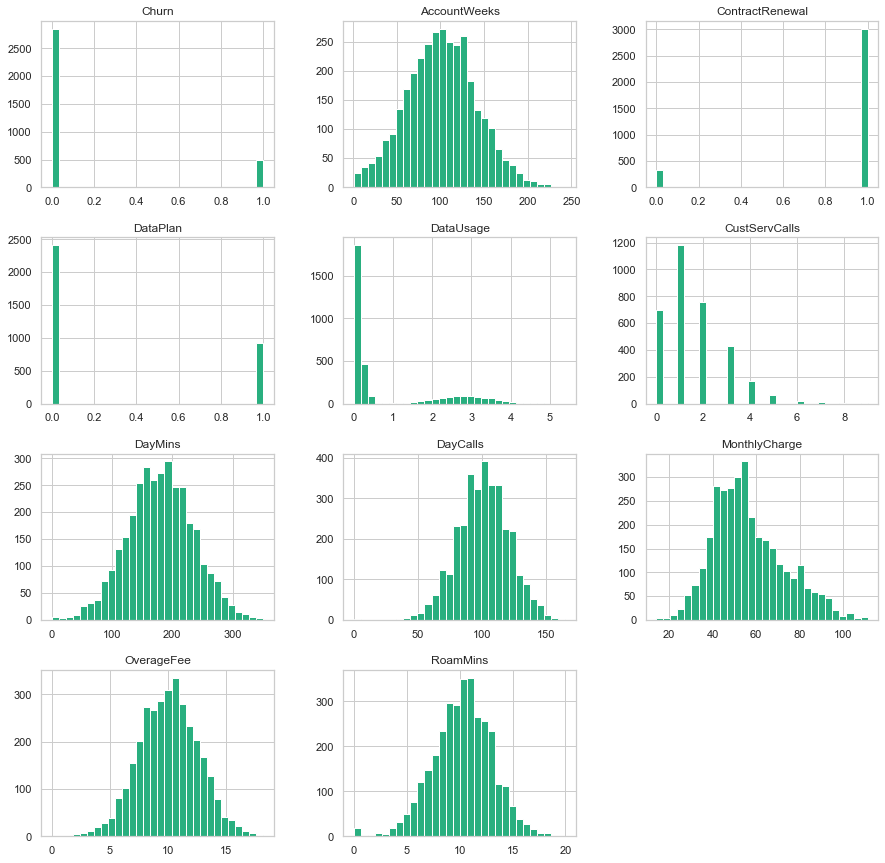

In [10]:
data.hist(figsize=(15,15), bins=30, color='#29AF7F')
plt.show()

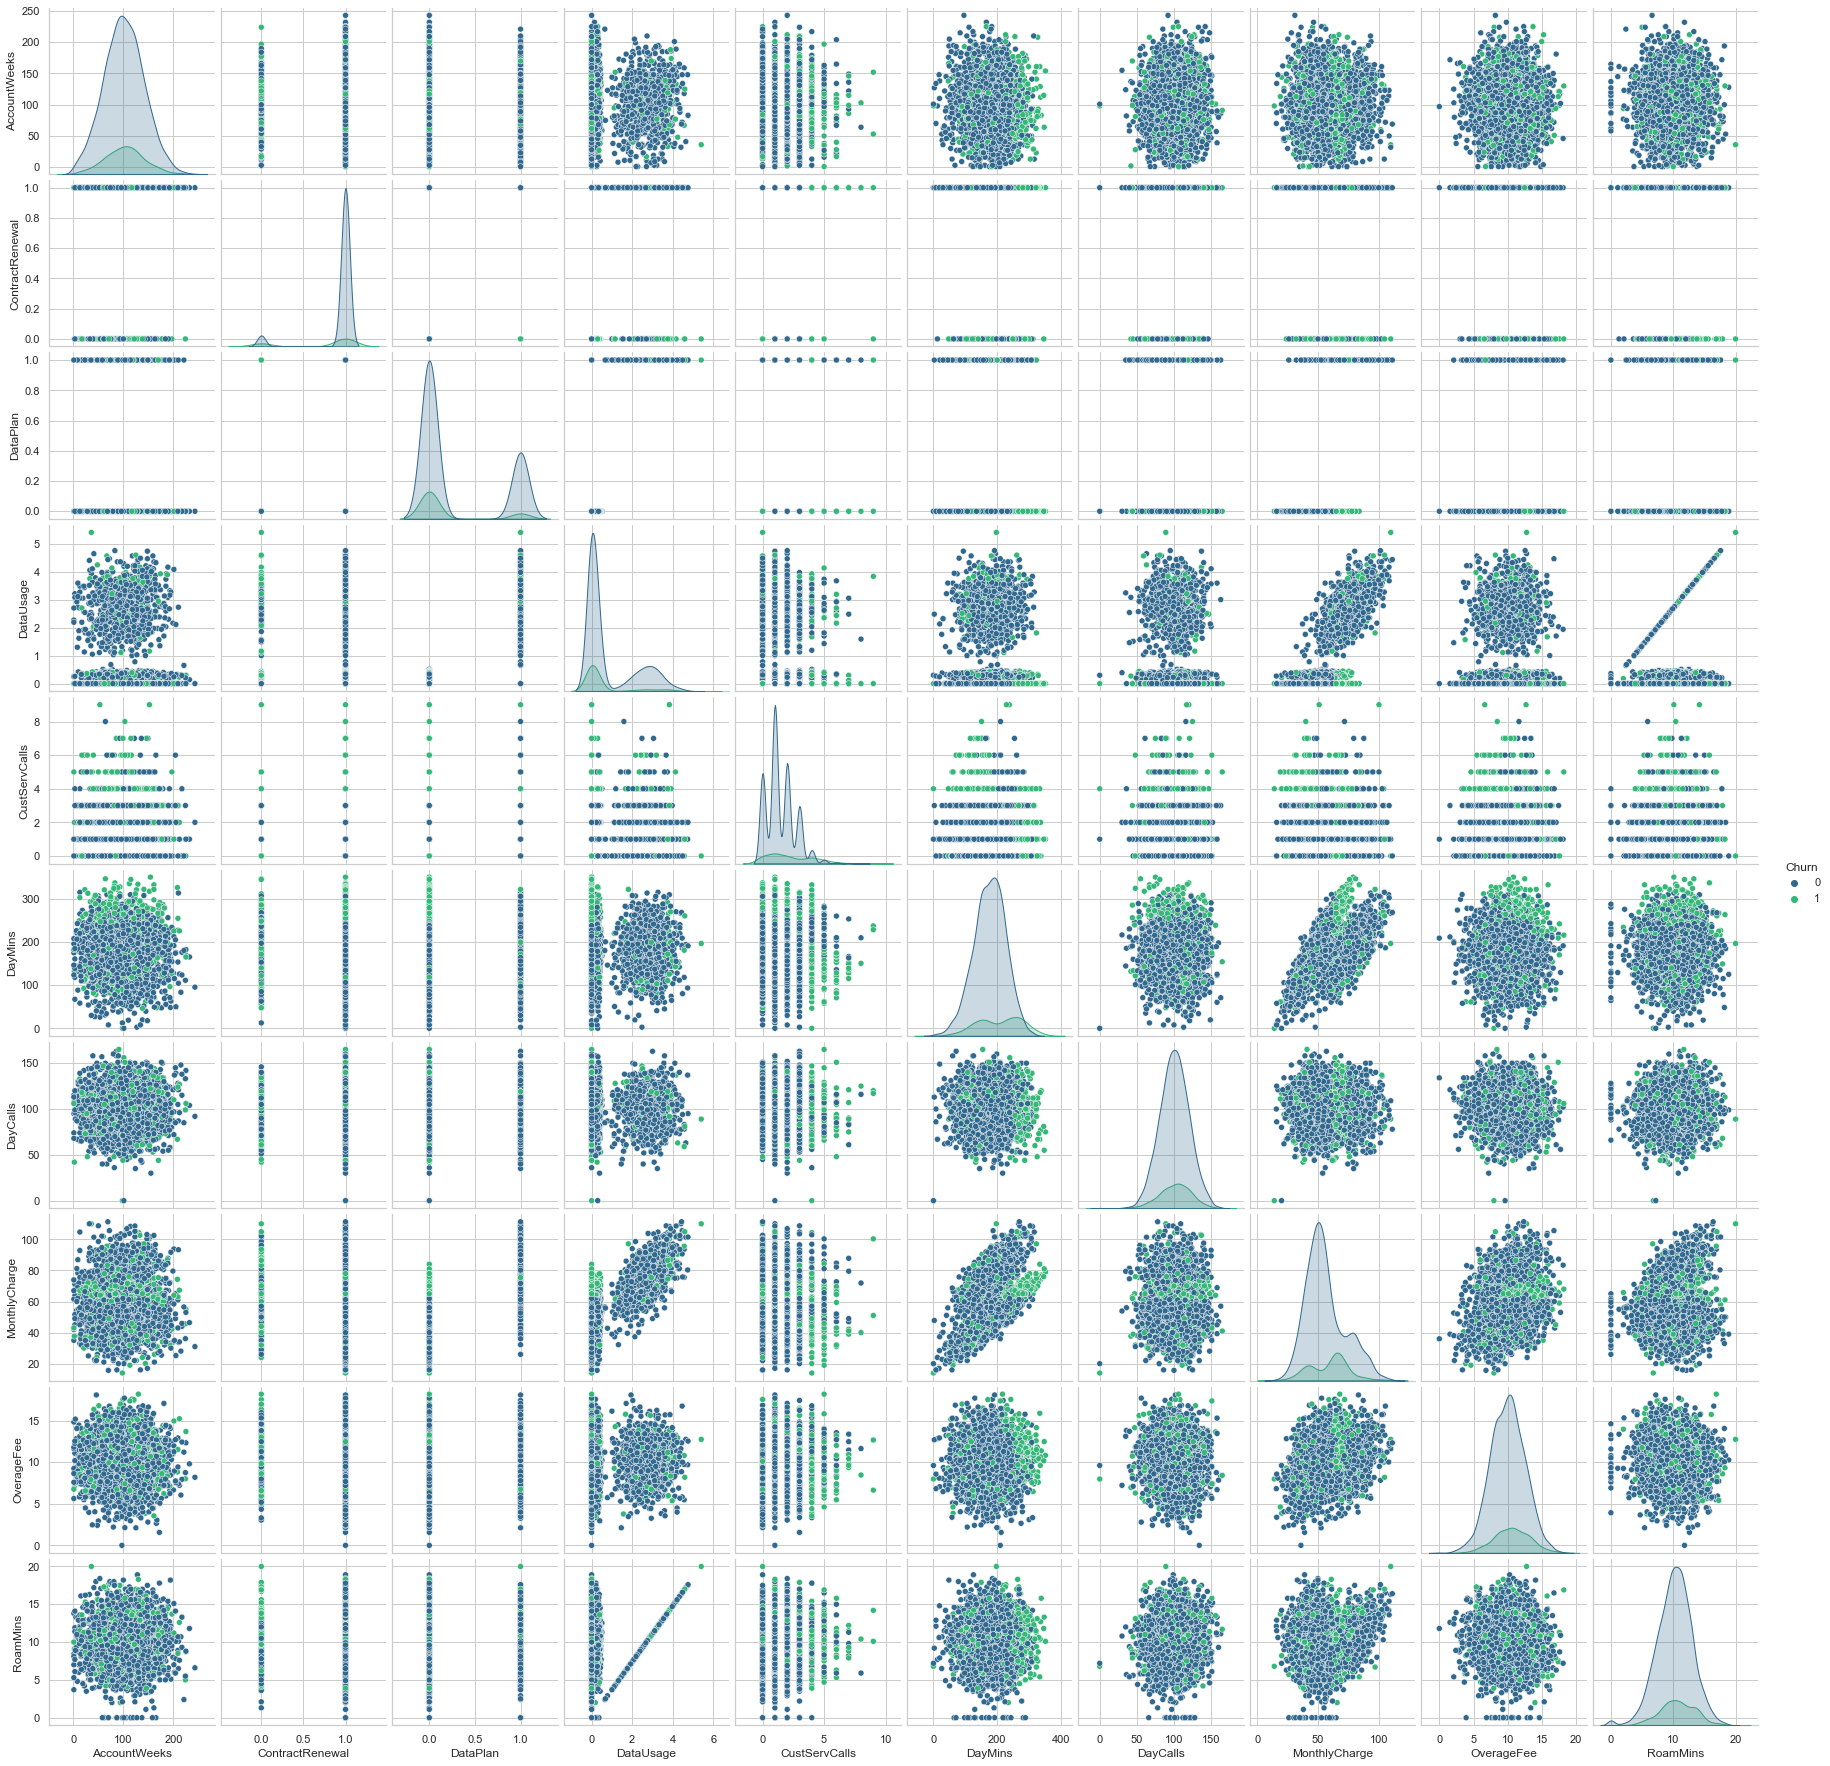

In [11]:
sns.pairplot(data, hue="Churn", palette = 'viridis')
plt.show()

- MonthlyCharge has a positive relationship with DataUsage, DayMins and OverageFee
- DataUsage has a linear relationship with RoamMins for those who have DataUsage more than 0.

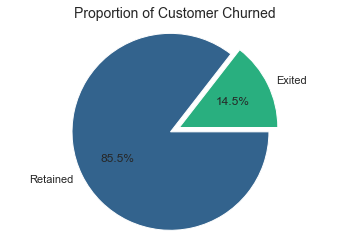

In [12]:
labels = 'Exited', 'Retained'
sizes = [data.Churn[data['Churn']==1].count(), data.Churn[data['Churn']==0].count()]
explode = (0, 0.1)
color_set = ['#29AF7F', '#33638D']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', 
        colors = color_set)
ax1.axis('equal')
plt.title("Proportion of Customer Churned", size = 14)
plt.show()

Our data has an imbalance proportion, the proportion who  retained is much higher than those who exited

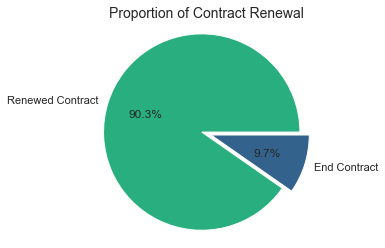

In [13]:
labels = 'Renewed Contract', 'End Contract'
sizes = [data.Churn[data['ContractRenewal']==1].count(), data.Churn[data['ContractRenewal']==0].count()]
explode = (0, 0.1)
color_set = ['#29AF7F', '#33638D']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', 
        colors = color_set)
ax1.axis('equal')
plt.title("Proportion of Contract Renewal", size = 14)
plt.show()

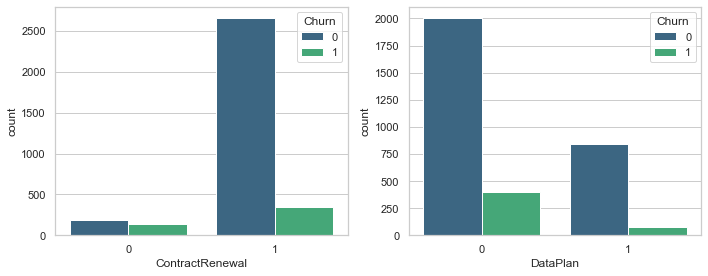

In [14]:
f, ax = plt.subplots(1, 2, figsize = (10, 4))

sns.countplot('ContractRenewal', hue = 'Churn', data = data, palette = "viridis", ax = ax[0])
sns.countplot('DataPlan', hue = 'Churn', data = data, palette = "viridis", ax = ax[1])

plt.tight_layout()
plt.show()

- Surprisingly the proportion of churned is higher among the customer who getting the contract renewal 
- Churning rate is higher when the customer don't have a data plan

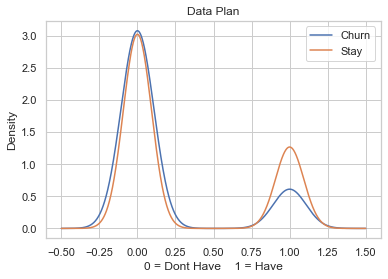

In [15]:
df_churn = data[data['Churn'] == 1]
df_notchurn = data[data['Churn'] == 0]
df_churn.DataPlan.plot.density(bw_method=None, ind=None, label='Churn')
df_notchurn.DataPlan.plot.density(bw_method=None, ind=None, label='Stay')
plt.xlabel('0 = Dont Have    1 = Have')
plt.title('Data Plan')
plt.legend()

Both types of customers have a similar density on whether they have or don’t have a data plan. However, loyal customers tend to be registered as data plan users. 

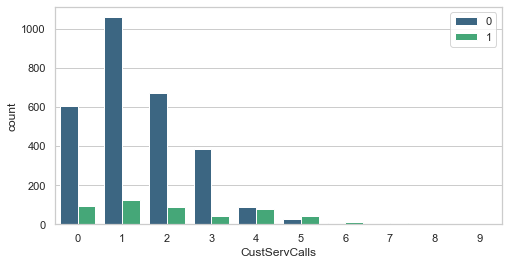

In [16]:
plt.figure(figsize = (8,4))

sns.countplot('CustServCalls', hue = 'Churn', data = data, palette = "viridis")

plt.legend(loc = 'upper right')
plt.show()

The mode is around 2 calls. When it's more than 3 or 4 calls, it's most likely to Churn.

In [17]:
df = data[(data['CustServCalls'] > 3)]

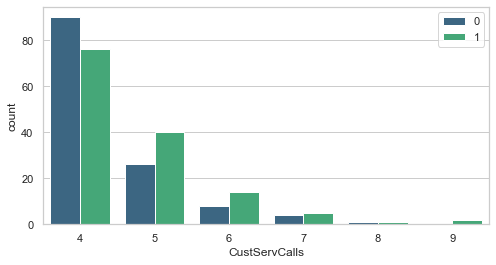

In [18]:
plt.figure(figsize = (8,4))

sns.countplot('CustServCalls', hue = 'Churn', data = df, palette = "viridis")

plt.legend(loc = 'upper right')
plt.show()

Text(0.5, 0, 'Customer Service Calls (times)')

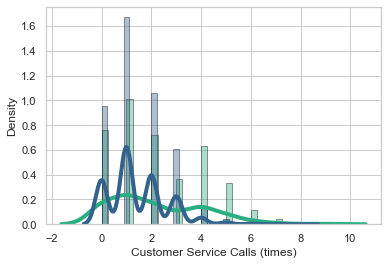

In [19]:
ax = sns.distplot(df_churn['CustServCalls'], hist=True, kde=True, 
             bins=int(180/5), color = '#29AF7F', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
sns.distplot(df_notchurn['CustServCalls'], hist=True, kde=True, 
             bins=int(180/5), color = '#33638D', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_xlabel("Customer Service Calls (times)", fontsize = 12)

Customers who churn have a higher frequency of customer service calls than loyal customers 

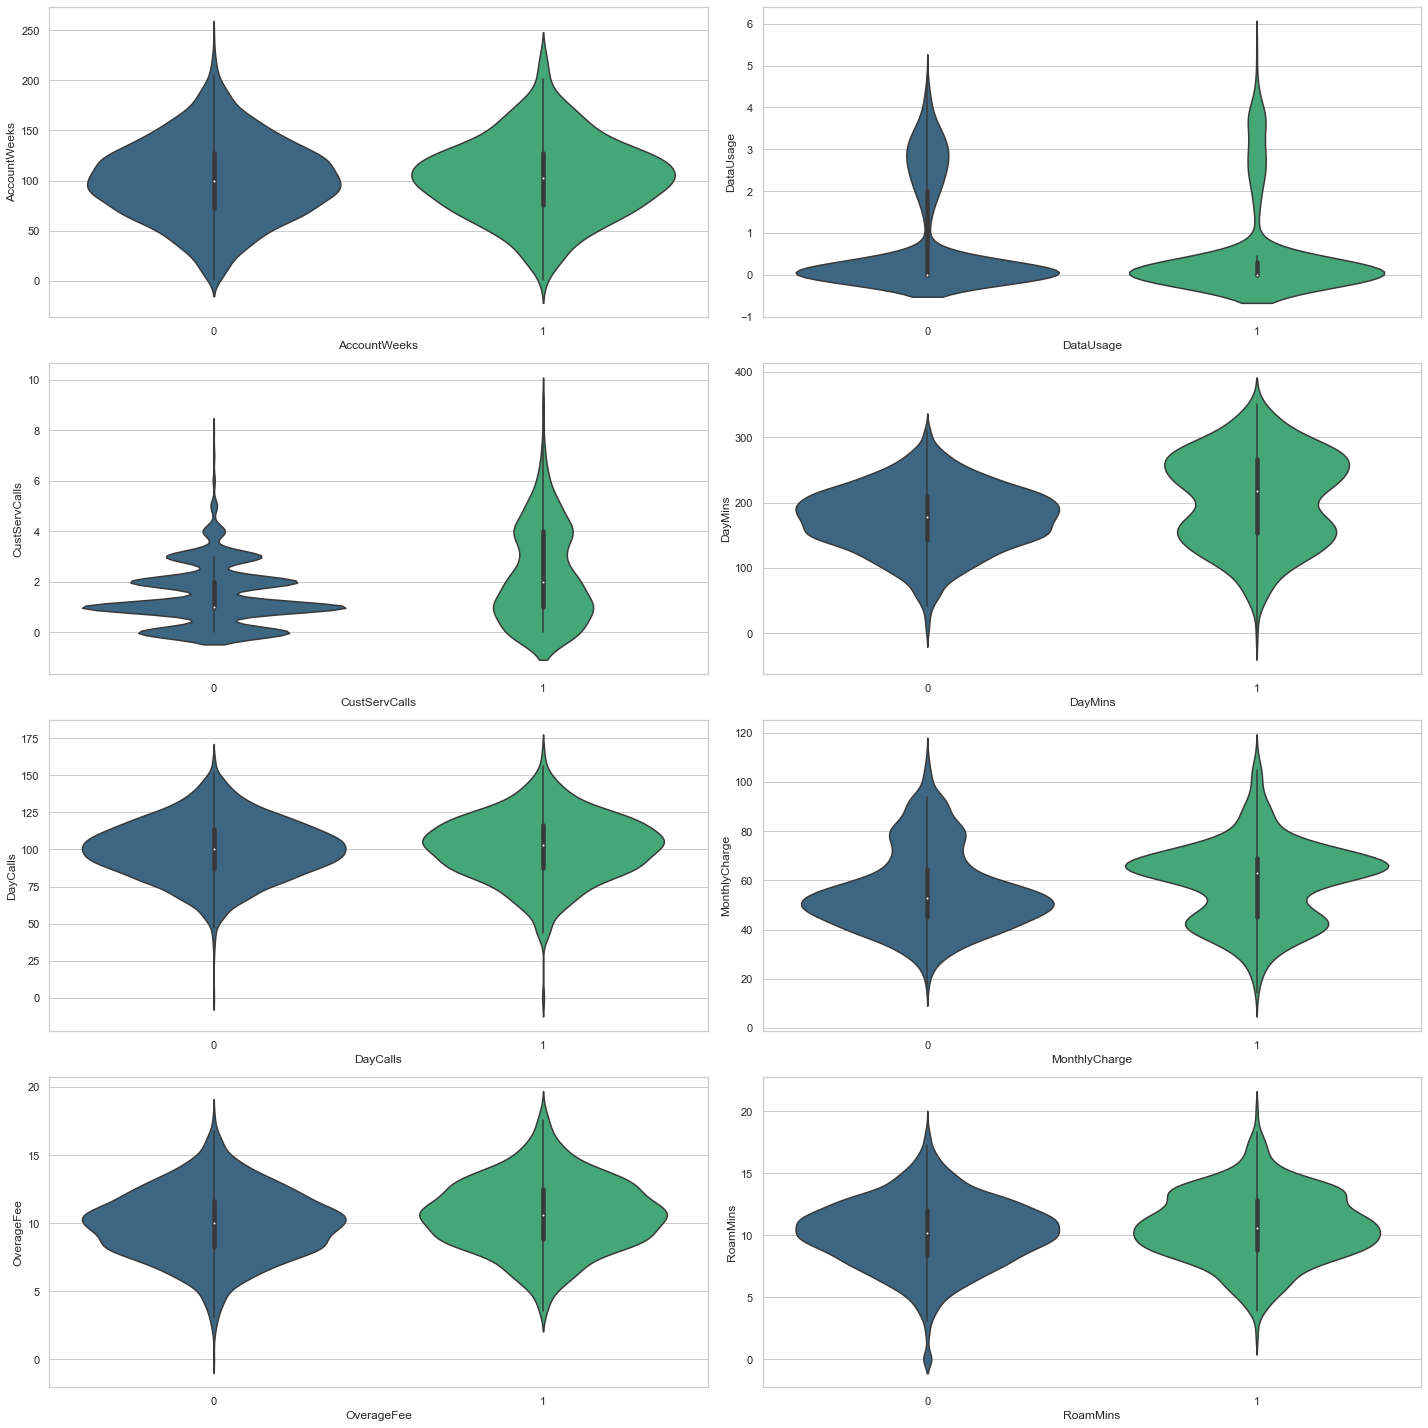

In [20]:
plt.figure(figsize = (20,20))
col = ['AccountWeeks', 'DataUsage','CustServCalls','DayMins','DayCalls',
      'MonthlyCharge', 'OverageFee', 'RoamMins']
c = 1
for i in col:
    if c < 9:
        plt.subplot(4,2,c)
        sns.violinplot(x = 'Churn',y = i,data =data, palette = "viridis" )
        plt.xlabel(i)
    c += 1
    plt.tight_layout()

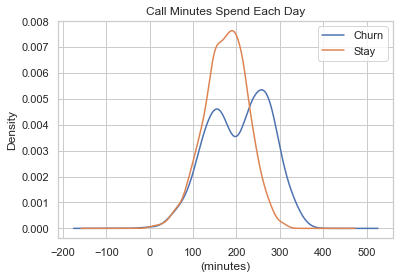

In [21]:
df_churn.DayMins.plot.density(bw_method=None, ind=None, label='Churn')
df_notchurn.DayMins.plot.density(bw_method=None, ind=None, label='Stay')
plt.title('Call Minutes Spend Each Day')
plt.xlabel('(minutes)')
plt.legend()

Customers who churn averagely have higher minutes on call while loyal customers have lower minutes on call around 200 minutes per day

Text(0.5, 1.0, 'Monthly Charge')

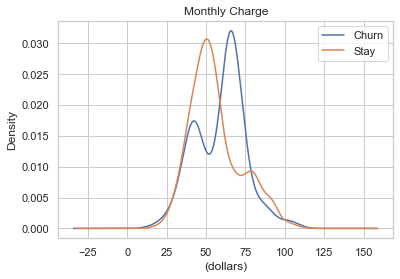

In [22]:
df_churn.MonthlyCharge.plot.density(bw_method=None, ind=None, label='Churn')
df_notchurn.MonthlyCharge.plot.density(bw_method=None, ind=None, label='Stay')
plt.legend()
plt.xlabel('(dollars)')
plt.title('Monthly Charge')

The graph indicates that customers who churn have higher monthly charge than loyal customers

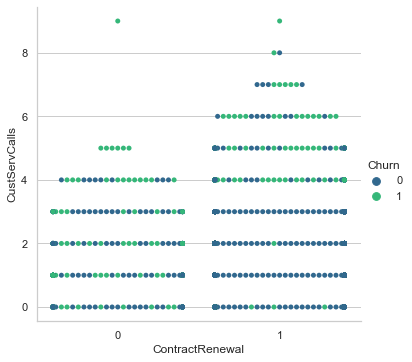

In [23]:
sns.catplot(x = 'ContractRenewal', y = 'CustServCalls', hue = 'Churn', 
              data = data, kind = 'swarm', palette = 'viridis')
plt.show()

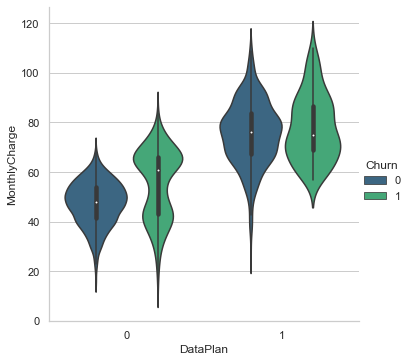

In [24]:
sns.catplot(x = 'DataPlan', y = 'MonthlyCharge', hue = 'Churn', 
              data = data, kind = 'violin', palette = 'viridis')
plt.show()

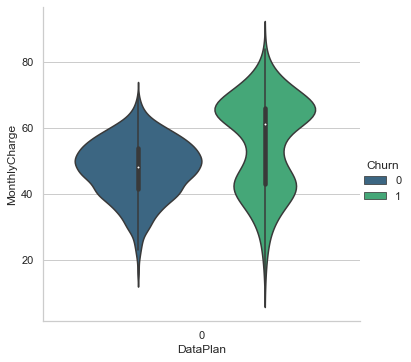

In [25]:
df = data[(data['DataPlan'] == 0)]

sns.catplot(x = 'DataPlan', y = 'MonthlyCharge', hue = 'Churn', 
              data = df, kind = 'violin', palette = 'viridis')
plt.show()

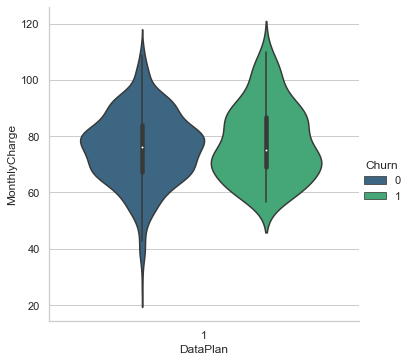

In [26]:
df2 = data[(data['DataPlan'] == 1)]
sns.catplot(x = 'DataPlan', y = 'MonthlyCharge', hue = 'Churn', 
              data = df2, kind = 'violin', palette = 'viridis')
plt.show()

In [27]:
data[(data['DataPlan'] == 0)].Churn.value_counts()

0    2008
1     403
Name: Churn, dtype: int64

In [28]:
data[(data['DataPlan'] == 1)].Churn.value_counts()

0    842
1     80
Name: Churn, dtype: int64

In [29]:
data[(data['DataPlan'] == 0) & (data['MonthlyCharge'] > 40.0)].Churn.value_counts()

0    1577
1     336
Name: Churn, dtype: int64

In [30]:
data[(data['DataPlan'] == 0) & (data['MonthlyCharge'] < 40.0)].Churn.value_counts()

0    384
1     60
Name: Churn, dtype: int64

In [31]:
data[(data['DataPlan'] == 1) & (data['MonthlyCharge'] > 60.0)].Churn.value_counts()

0    754
1     75
Name: Churn, dtype: int64

In [32]:
data[(data['DataPlan'] == 1) & (data['MonthlyCharge'] < 60.0)].Churn.value_counts()

0    87
1     5
Name: Churn, dtype: int64

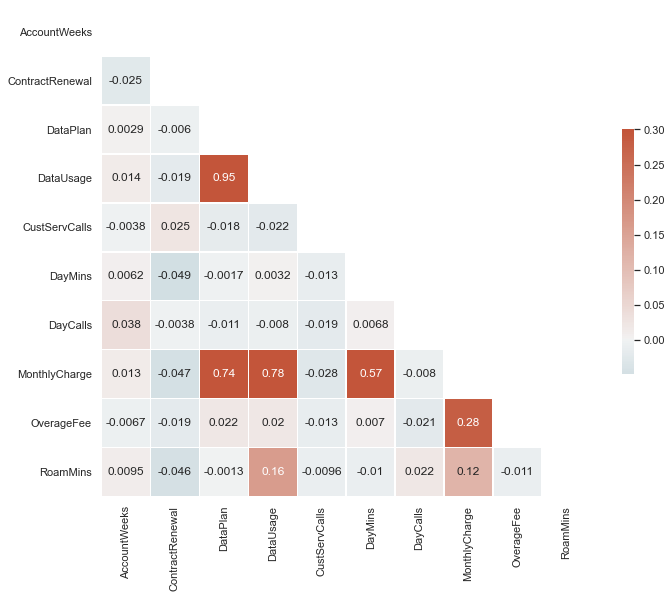

In [33]:
corr = data.iloc[:,1:].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, annot = True, cbar_kws={"shrink": .5})
plt.show()

### Classification Modeling

In [34]:
x = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [38]:
pipeline_lr = Pipeline([('LogisticRegression', LogisticRegression(random_state = 42))])
pipeline_svc = Pipeline([('SVC', SVC(random_state = 42, probability = True))])
pipeline_knn = Pipeline([('KNN', KNeighborsClassifier())])
pipeline_nb = Pipeline([('NaiveBayes', GaussianNB())])
pipeline_dt = Pipeline([('DecisionTree', DecisionTreeClassifier(random_state = 42))])
pipeline_rf = Pipeline([('RandomForest', RandomForestClassifier(random_state = 42))])
pipeline_cat = Pipeline([('CatBoost', CatBoostClassifier(random_state = 42))])

In [39]:
pipelines = [pipeline_lr, pipeline_svc, pipeline_knn, pipeline_nb, pipeline_dt, pipeline_rf, pipeline_cat]

In [40]:
best_score = 0.0
best_classifier = 0
best_pipeline = ""

In [41]:
pipe_dict = {0:'LogisticRegression', 1:'SVC', 2:'KNN', 3:'NaiveBayes', 4:'DecisionTree', 5: 'RandomForest', 6:'CatBoost'}

for pipe in pipelines:
    pipe.fit(x_train,y_train)

Learning rate set to 0.015659
0:	learn: 0.6785934	total: 62.1ms	remaining: 1m 2s
1:	learn: 0.6578101	total: 65.6ms	remaining: 32.7s
2:	learn: 0.6419261	total: 69ms	remaining: 22.9s
3:	learn: 0.6270032	total: 72.1ms	remaining: 18s
4:	learn: 0.6110038	total: 75.2ms	remaining: 15s
5:	learn: 0.5936501	total: 78.2ms	remaining: 12.9s
6:	learn: 0.5829415	total: 81.4ms	remaining: 11.5s
7:	learn: 0.5689842	total: 84.6ms	remaining: 10.5s
8:	learn: 0.5546663	total: 87.7ms	remaining: 9.66s
9:	learn: 0.5417957	total: 90.7ms	remaining: 8.98s
10:	learn: 0.5327939	total: 93.7ms	remaining: 8.43s
11:	learn: 0.5202906	total: 96.8ms	remaining: 7.97s
12:	learn: 0.5066067	total: 100ms	remaining: 7.61s
13:	learn: 0.4966424	total: 103ms	remaining: 7.27s
14:	learn: 0.4857214	total: 106ms	remaining: 6.99s
15:	learn: 0.4767099	total: 109ms	remaining: 6.73s
16:	learn: 0.4686818	total: 113ms	remaining: 6.51s
17:	learn: 0.4596934	total: 116ms	remaining: 6.32s
18:	learn: 0.4503044	total: 119ms	remaining: 6.14s
19:	l

207:	learn: 0.1749958	total: 745ms	remaining: 2.83s
208:	learn: 0.1748226	total: 748ms	remaining: 2.83s
209:	learn: 0.1746038	total: 752ms	remaining: 2.83s
210:	learn: 0.1744682	total: 756ms	remaining: 2.83s
211:	learn: 0.1743036	total: 760ms	remaining: 2.82s
212:	learn: 0.1741588	total: 764ms	remaining: 2.82s
213:	learn: 0.1739694	total: 768ms	remaining: 2.82s
214:	learn: 0.1737484	total: 774ms	remaining: 2.83s
215:	learn: 0.1734576	total: 778ms	remaining: 2.82s
216:	learn: 0.1733355	total: 781ms	remaining: 2.82s
217:	learn: 0.1731750	total: 786ms	remaining: 2.82s
218:	learn: 0.1729676	total: 789ms	remaining: 2.81s
219:	learn: 0.1727784	total: 792ms	remaining: 2.81s
220:	learn: 0.1726133	total: 795ms	remaining: 2.8s
221:	learn: 0.1724653	total: 798ms	remaining: 2.8s
222:	learn: 0.1722382	total: 801ms	remaining: 2.79s
223:	learn: 0.1720259	total: 804ms	remaining: 2.79s
224:	learn: 0.1718560	total: 807ms	remaining: 2.78s
225:	learn: 0.1716867	total: 810ms	remaining: 2.77s
226:	learn: 0.

366:	learn: 0.1528507	total: 1.29s	remaining: 2.23s
367:	learn: 0.1526850	total: 1.29s	remaining: 2.23s
368:	learn: 0.1525722	total: 1.3s	remaining: 2.22s
369:	learn: 0.1525213	total: 1.3s	remaining: 2.22s
370:	learn: 0.1523783	total: 1.31s	remaining: 2.21s
371:	learn: 0.1522028	total: 1.31s	remaining: 2.21s
372:	learn: 0.1521650	total: 1.31s	remaining: 2.21s
373:	learn: 0.1521002	total: 1.32s	remaining: 2.21s
374:	learn: 0.1519914	total: 1.32s	remaining: 2.2s
375:	learn: 0.1519149	total: 1.32s	remaining: 2.2s
376:	learn: 0.1517660	total: 1.33s	remaining: 2.19s
377:	learn: 0.1516683	total: 1.33s	remaining: 2.19s
378:	learn: 0.1515409	total: 1.33s	remaining: 2.19s
379:	learn: 0.1514585	total: 1.34s	remaining: 2.18s
380:	learn: 0.1512909	total: 1.34s	remaining: 2.18s
381:	learn: 0.1510951	total: 1.34s	remaining: 2.17s
382:	learn: 0.1509779	total: 1.35s	remaining: 2.17s
383:	learn: 0.1508972	total: 1.35s	remaining: 2.17s
384:	learn: 0.1508361	total: 1.35s	remaining: 2.16s
385:	learn: 0.15

533:	learn: 0.1363077	total: 1.84s	remaining: 1.61s
534:	learn: 0.1361912	total: 1.84s	remaining: 1.6s
535:	learn: 0.1361570	total: 1.85s	remaining: 1.6s
536:	learn: 0.1360709	total: 1.85s	remaining: 1.6s
537:	learn: 0.1359943	total: 1.86s	remaining: 1.59s
538:	learn: 0.1358365	total: 1.86s	remaining: 1.59s
539:	learn: 0.1356974	total: 1.86s	remaining: 1.59s
540:	learn: 0.1355898	total: 1.87s	remaining: 1.58s
541:	learn: 0.1355245	total: 1.87s	remaining: 1.58s
542:	learn: 0.1354007	total: 1.87s	remaining: 1.58s
543:	learn: 0.1353460	total: 1.88s	remaining: 1.57s
544:	learn: 0.1353157	total: 1.88s	remaining: 1.57s
545:	learn: 0.1351931	total: 1.88s	remaining: 1.57s
546:	learn: 0.1351693	total: 1.89s	remaining: 1.56s
547:	learn: 0.1350835	total: 1.89s	remaining: 1.56s
548:	learn: 0.1349005	total: 1.89s	remaining: 1.55s
549:	learn: 0.1348761	total: 1.9s	remaining: 1.55s
550:	learn: 0.1347666	total: 1.9s	remaining: 1.55s
551:	learn: 0.1346345	total: 1.9s	remaining: 1.54s
552:	learn: 0.1345

707:	learn: 0.1224609	total: 2.39s	remaining: 986ms
708:	learn: 0.1224299	total: 2.4s	remaining: 983ms
709:	learn: 0.1223614	total: 2.4s	remaining: 980ms
710:	learn: 0.1222404	total: 2.4s	remaining: 977ms
711:	learn: 0.1222016	total: 2.41s	remaining: 974ms
712:	learn: 0.1221891	total: 2.41s	remaining: 971ms
713:	learn: 0.1221386	total: 2.41s	remaining: 967ms
714:	learn: 0.1220752	total: 2.42s	remaining: 964ms
715:	learn: 0.1219269	total: 2.42s	remaining: 961ms
716:	learn: 0.1218577	total: 2.42s	remaining: 957ms
717:	learn: 0.1218376	total: 2.43s	remaining: 954ms
718:	learn: 0.1217901	total: 2.43s	remaining: 950ms
719:	learn: 0.1217478	total: 2.43s	remaining: 947ms
720:	learn: 0.1216977	total: 2.44s	remaining: 944ms
721:	learn: 0.1215607	total: 2.44s	remaining: 940ms
722:	learn: 0.1214567	total: 2.44s	remaining: 937ms
723:	learn: 0.1213772	total: 2.45s	remaining: 933ms
724:	learn: 0.1213188	total: 2.45s	remaining: 930ms
725:	learn: 0.1211453	total: 2.45s	remaining: 926ms
726:	learn: 0.1

874:	learn: 0.1090121	total: 2.95s	remaining: 421ms
875:	learn: 0.1089633	total: 2.95s	remaining: 418ms
876:	learn: 0.1088810	total: 2.96s	remaining: 415ms
877:	learn: 0.1088310	total: 2.96s	remaining: 411ms
878:	learn: 0.1087525	total: 2.96s	remaining: 408ms
879:	learn: 0.1087132	total: 2.97s	remaining: 405ms
880:	learn: 0.1086184	total: 2.97s	remaining: 402ms
881:	learn: 0.1085550	total: 2.98s	remaining: 398ms
882:	learn: 0.1084554	total: 2.98s	remaining: 395ms
883:	learn: 0.1083996	total: 2.98s	remaining: 391ms
884:	learn: 0.1083316	total: 2.98s	remaining: 388ms
885:	learn: 0.1082866	total: 2.99s	remaining: 385ms
886:	learn: 0.1081976	total: 2.99s	remaining: 381ms
887:	learn: 0.1081327	total: 2.99s	remaining: 378ms
888:	learn: 0.1080466	total: 3s	remaining: 374ms
889:	learn: 0.1079469	total: 3s	remaining: 371ms
890:	learn: 0.1078092	total: 3s	remaining: 368ms
891:	learn: 0.1077880	total: 3.01s	remaining: 364ms
892:	learn: 0.1076484	total: 3.01s	remaining: 361ms
893:	learn: 0.1075598

In [42]:
for i,model in enumerate (pipelines):
    print("{}, Accuracy Score: {}".format(pipe_dict[i],model.score(x_test,y_test)))

LogisticRegression, Accuracy Score: 0.8725637181409296
SVC, Accuracy Score: 0.9280359820089955
KNN, Accuracy Score: 0.9145427286356822
NaiveBayes, Accuracy Score: 0.8440779610194903
DecisionTree, Accuracy Score: 0.8860569715142429
RandomForest, Accuracy Score: 0.9430284857571214
CatBoost, Accuracy Score: 0.9370314842578711


In [43]:
for i, model in enumerate(pipelines):
    if model.score(x_test,y_test) > best_score:
        best_score = model.score(x_test,y_test)
        best_pipeline = model
        best_classifier = i

print('Classifier with best score: {}'.format(pipe_dict[best_classifier]))

Classifier with best score: RandomForest


In [44]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

count = 0

for pipe in pipelines:
    y_pred = pipe.predict(x_test)
    ypred_ = pipe.predict_proba(x_test)
    ypred_proba = [i[1] for i in ypred_]
    
    for i in pipe_dict:
        if i == count:
            print("{}, F1 Score: {}".format(pipe_dict[i], f1_score(y_test, y_pred)))
            print("{}, AUC Score: {}".format(pipe_dict[i], roc_auc_score(y_test, ypred_proba)))
        else:
            pass
    
    count += 1
    print("\n")

LogisticRegression, F1 Score: 0.2975206611570248
LogisticRegression, AUC Score: 0.8005181347150259


SVC, F1 Score: 0.6712328767123287
SVC, AUC Score: 0.8823991207410897


KNN, F1 Score: 0.5957446808510639
KNN, AUC Score: 0.8243248547652694


NaiveBayes, F1 Score: 0.42857142857142855
NaiveBayes, AUC Score: 0.8331763228136285


DecisionTree, F1 Score: 0.62
DecisionTree, AUC Score: 0.8090948343539017


RandomForest, F1 Score: 0.7738095238095237
RandomForest, AUC Score: 0.907059585492228


CatBoost, F1 Score: 0.7407407407407407
CatBoost, AUC Score: 0.910778772177736




Classifier with best F1 Score: RandomForest <br>
Classifier with best AUC Score: CatBoost

> *while ROC was unaffected by skew, the precision-recall curves suggest that ROC may mask poor performance in some cases. Searching for a good performance metrics is still a open question. A general F1-score may help* <br>

https://stats.stackexchange.com/questions/210700/how-to-choose-between-roc-auc-and-f1-score

Since we have imbalanced dataset we'll use F1 Score as our evaluation metrics. With that being said, RandomForest is the best classifier for our project

### Rebalance Sample Size

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [46]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 1, random_state = 42)
x_smote, y_smote = smote.fit_resample(x_train, y_train)

In [47]:
from collections import Counter
Counter(y_smote)

Counter({0: 2271, 1: 2271})

In [48]:
sc = StandardScaler()
x_train = sc.fit_transform(x_smote)
x_test = sc.transform(x_test)

In [49]:
classifier = RandomForestClassifier(random_state = 42)
classifier.fit(x_train, y_smote)

RandomForestClassifier(random_state=42)

In [50]:
y_pred = classifier.predict(x_test)
print("F1 Score:", round(f1_score(y_test, y_pred), ndigits = 4))

F1 Score: 0.7273


In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: {0:.2f}%'.format(100 * accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

[[548  31]
 [ 20  68]]
Accuracy: 92.35%
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       579
           1       0.69      0.77      0.73        88

    accuracy                           0.92       667
   macro avg       0.83      0.86      0.84       667
weighted avg       0.93      0.92      0.93       667



### Cross Validation

In [52]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_smote, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 94.83 %
Standard Deviation: 2.75 %


In [53]:
print(accuracies)

[0.88791209 0.9010989  0.96475771 0.95374449 0.96035242 0.96255507
 0.969163   0.95154185 0.96475771 0.96696035]


## Parameter Tuning 

In [54]:
params = [5,6,7,8,9,10,11,12,13,14,15]

for i in params:
    classifier = RandomForestClassifier(max_depth = i, random_state = 42)
    classifier.fit(x_train, y_smote)
    y_pred = classifier.predict(x_test)
    accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_smote, cv = 10)
    print('max_depth =', i)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print("F1 Score:", round(f1_score(y_test, y_pred), ndigits = 4), '\n')

max_depth = 5
Accuracy: 90.49 %
Standard Deviation: 1.65 %
F1 Score: 0.6516 

max_depth = 6
Accuracy: 91.13 %
Standard Deviation: 1.59 %
F1 Score: 0.6698 

max_depth = 7
Accuracy: 91.77 %
Standard Deviation: 1.49 %
F1 Score: 0.7041 

max_depth = 8
Accuracy: 92.25 %
Standard Deviation: 1.71 %
F1 Score: 0.7113 

max_depth = 9
Accuracy: 92.56 %
Standard Deviation: 1.59 %
F1 Score: 0.6974 

max_depth = 10
Accuracy: 93.24 %
Standard Deviation: 1.93 %
F1 Score: 0.7196 

max_depth = 11
Accuracy: 93.62 %
Standard Deviation: 2.27 %
F1 Score: 0.7047 

max_depth = 12
Accuracy: 93.77 %
Standard Deviation: 2.53 %
F1 Score: 0.7166 

max_depth = 13
Accuracy: 94.28 %
Standard Deviation: 2.55 %
F1 Score: 0.734 

max_depth = 14
Accuracy: 94.54 %
Standard Deviation: 2.80 %
F1 Score: 0.7166 

max_depth = 15
Accuracy: 94.67 %
Standard Deviation: 2.72 %
F1 Score: 0.7204 



Based on the results above, we decide to use the max_depth parameter equal to 10 with the consideration of smaller standard deviation and higher F1 score

In [55]:
classifier = RandomForestClassifier(max_depth = 10, random_state = 42)
classifier.fit(x_train, y_smote)

RandomForestClassifier(max_depth=10, random_state=42)

In [56]:
y_pred = classifier.predict(x_test)

In [57]:
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_smote, cv = 10)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[0.89450549 0.8967033  0.93612335 0.93612335 0.94713656 0.94933921
 0.94273128 0.92951542 0.94493392 0.94713656]
Accuracy: 93.24 %
Standard Deviation: 1.93 %


In [58]:
ypred = classifier.predict_proba(x_test)
ypred_proba = [i[1] for i in ypred]
roc_auc_score(y_test, ypred_proba)

0.9152339456743602

In [59]:
print(f1_score(y_test, y_pred))

0.7195767195767195


In [60]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: {0:.2f}%'.format(100 * accuracy_score(y_test, y_pred)))

[[546  33]
 [ 20  68]]
Accuracy: 92.05%


### Feature Importance

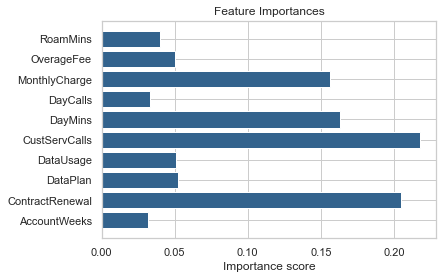

In [61]:
X = data.iloc[:, 1:]
plt.barh(X.columns, classifier.feature_importances_, color = '#33638D')
plt.xlabel("Importance score")
plt.title("Feature Importances")
plt.show()

### Results and Summary

👇🏻To wrap up our findings below is the complete summary👇🏻

**The consumer behavior who likely to churn**
- Has more tendencies to call Customer Service at least 4 times
- Didn't have a Data Plan
- Spend more minutes on calls
- As a result, they have to pay more for the monthly charge


**Factor contributes to customer churn** <br>
Based on our model, the important features in our dataset are: 
- Customer Service Call
- Contract Renewal
- Daymins (Average daytime minutes per month)
- Monthly Charge

**Conclusion**
- From our EDA results, the company could use our findings to improve its services in a way that increases satisfaction for those customers that are more likely to churn. i.e Educating the customer about the feature and benefits of using Data Plan, Have a better customer service by giving a well training to the staff
- We have built a machine learning that can predict any new customer churn with **93%** accuracy, and from the information, the company can be prepared to keep their maximum customer by doing some special offers for those customers.